#### Imports

In [3]:
import scipy
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize
from astropy.io import fits

import sys
sys.path.append("../src")

from utils.data_alignment import align_channels_stars_galaxies

#### Align images

In [6]:
# Provide the file paths of the spectral band files
data_dir = "../../data/"
file_to_use = "008162-6-0080"
calib_obj_name = file_to_use.rsplit("-", 1)[0]
file_paths = [
    f"{data_dir}{file_to_use}/frame-i-{file_to_use}.fits.bz2",
    f"{data_dir}{file_to_use}/frame-r-{file_to_use}.fits.bz2",
    f"{data_dir}{file_to_use}/frame-g-{file_to_use}.fits.bz2",
    f"{data_dir}{file_to_use}/frame-u-{file_to_use}.fits.bz2",
    f"{data_dir}{file_to_use}/frame-z-{file_to_use}.fits.bz2",
]
star_path = f"{data_dir}{file_to_use}/calibObj-{calib_obj_name}-star.fits.gz"
galaxy_path = f"{data_dir}{file_to_use}/calibObj-{calib_obj_name}-gal.fits.gz"

In [7]:
image, stars, galaxies = align_channels_stars_galaxies(
    file_paths, star_path, galaxy_path
)
print(
    f"""
    Image of size: {image.shape}
    With total range: [{image.min()},{image.max()}]
    With range (in irg channels): [{image[:,:,:3].min()},{image[:,:,:3].max()}]
    Contains {stars.shape[0]} stars and {galaxies.shape[0]} galaxies.
"""
)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]



    Image of size: (1476, 2044, 5)
    With total range: [-0.845306396484375,1699.375]
    With range (in irg channels): [-0.259765625,229.392578125]
    Contains 907 stars and 305 galaxies.



In [8]:
scipy.io.savemat(
    f"{data_dir}processed/{file_to_use}.mat",
    {"image": image, "stars": stars, "galaxies": galaxies},
)

#### Aligned vs Unaligned images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


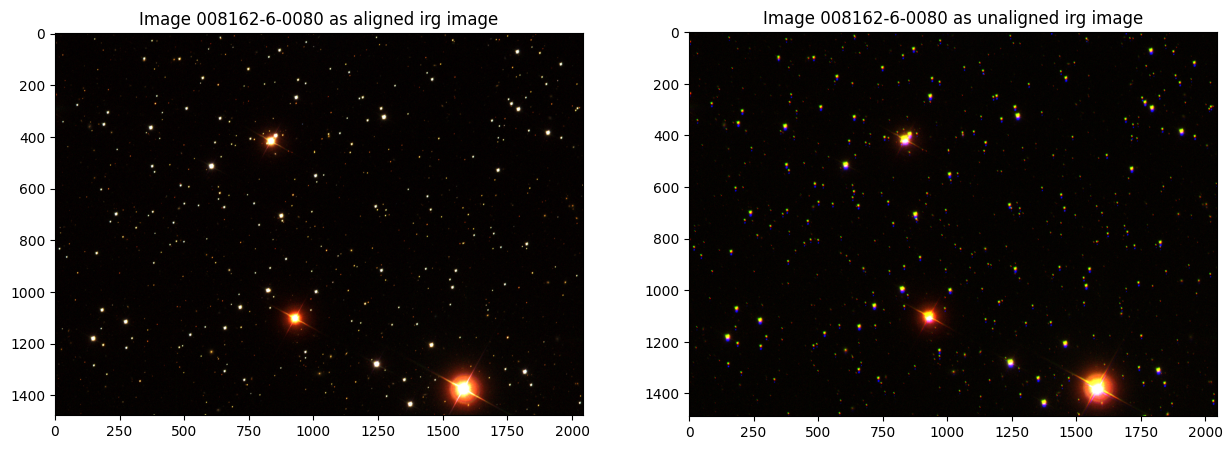

In [9]:
unaligned_img = []
for i in range(3):
    fits_file = fits.open(file_paths[i])
    unaligned_img.append(fits_file[0].data)
unaligned_img = np.stack(unaligned_img, axis=-1)

# Create interval object
interval = MinMaxInterval()
vmin, vmax = interval.get_limits(image[:, :, :3])

# Create an ImageNormalize object using a SqrtStretch object
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())

fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(image[:, :, :3], norm=norm)
ax[0].title.set_text(f"Image {file_to_use} as aligned irg image")

ax[1].imshow(unaligned_img[:, :, :3], norm=norm)
ax[1].title.set_text(f"Image {file_to_use} as unaligned irg image")
plt.show()

#### Star and galaxy locations

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


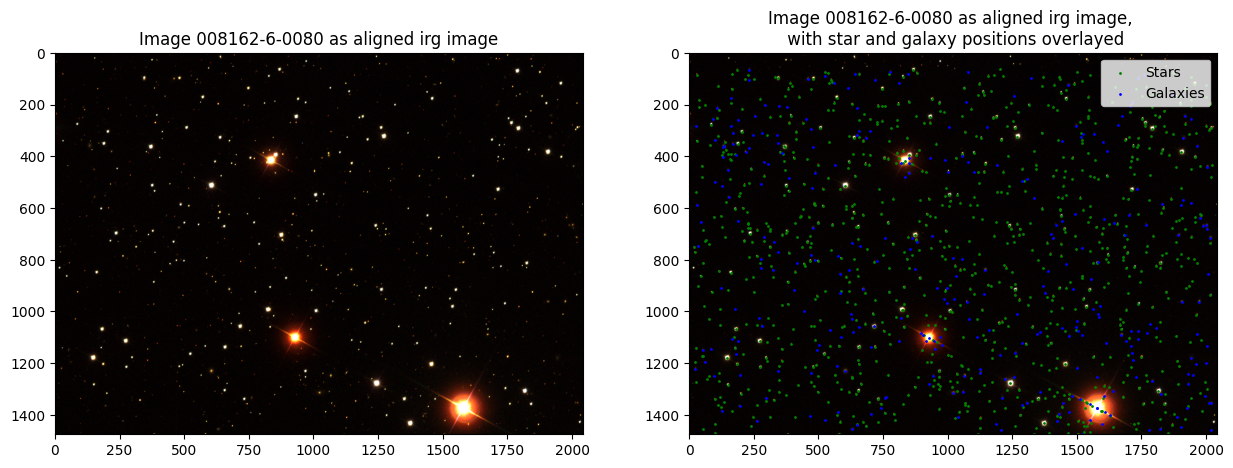

In [11]:
# Create interval object
interval = MinMaxInterval()
vmin, vmax = interval.get_limits(image[:, :, :3])

# Create an ImageNormalize object using a SqrtStretch object
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())

fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(image[:, :, :3], norm=norm)
ax[0].title.set_text(f"Image {file_to_use} as aligned irg image")


ax[1].scatter(stars[:, 0], stars[:, 1], color="green", s=1, label="Stars")
ax[1].scatter(galaxies[:, 0], galaxies[:, 1], color="blue", s=1, label="Galaxies")
ax[1].imshow(image[:, :, :3], norm=norm)
ax[1].legend(loc="upper right")
ax[1].title.set_text(
    f"Image {file_to_use} as aligned irg image, \n with star and galaxy positions overlayed"
)
plt.show()

#### Histogram of Spatial Distribution

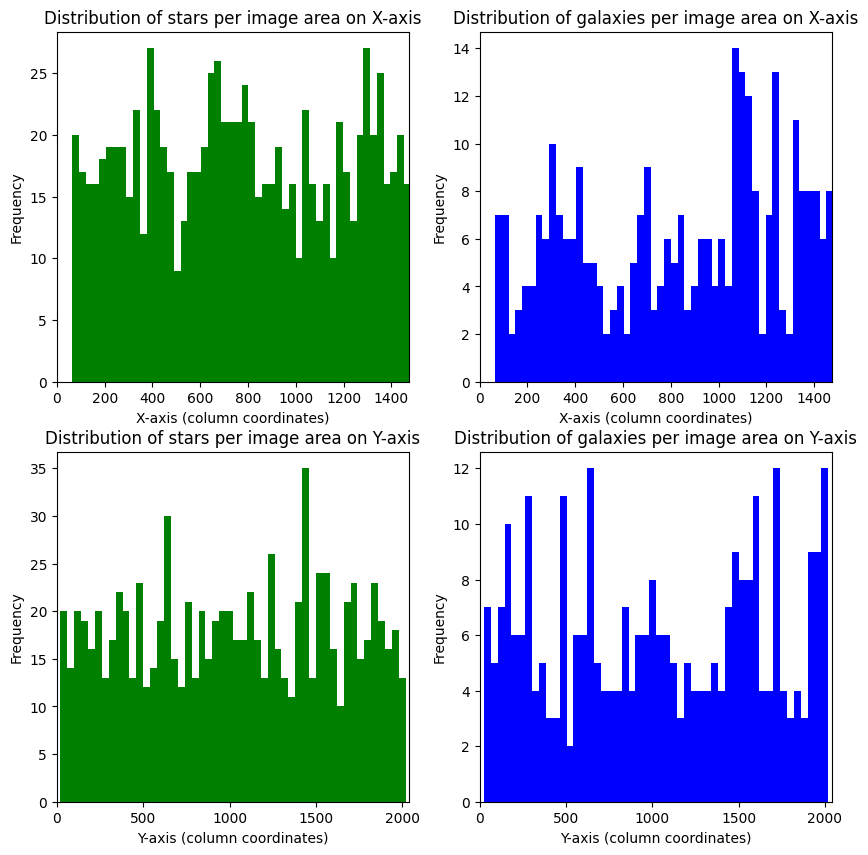

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].hist(
    stars[:, 1], bins=50, color="green"
)  # Adjust the number of bins as needed
ax[0, 0].set_xlabel("X-axis (column coordinates)")
ax[0, 0].set_ylabel("Frequency")
ax[0, 0].title.set_text("Distribution of stars per image area on X-axis")
ax[0, 0].set_xlim(0, 1474)

ax[0, 1].hist(
    galaxies[:, 1], bins=50, color="blue"
)  # Adjust the number of bins as needed
ax[0, 1].set_xlabel("X-axis (column coordinates)")
ax[0, 1].set_ylabel("Frequency")
ax[0, 1].title.set_text("Distribution of galaxies per image area on X-axis")
ax[0, 1].set_xlim(0, 1474)

ax[1, 0].hist(
    stars[:, 0], bins=50, color="green"
)  # Adjust the number of bins as needed
ax[1, 0].set_xlabel("Y-axis (column coordinates)")
ax[1, 0].set_ylabel("Frequency")
ax[1, 0].title.set_text("Distribution of stars per image area on Y-axis")
ax[1, 0].set_xlim(0, 2041)

ax[1, 1].hist(
    galaxies[:, 0], bins=50, color="blue"
)  # Adjust the number of bins as needed
ax[1, 1].set_xlabel("Y-axis (column coordinates)")
ax[1, 1].set_ylabel("Frequency")
ax[1, 1].title.set_text("Distribution of galaxies per image area on Y-axis")
ax[1, 1].set_xlim(0, 2041)


plt.show()